In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.transforms as mtransforms
from pathlib import Path
import os

In [2]:
obs_df = pd.read_csv("./data/figure_s5_obs_scores_lfc.txt", sep=" ")
p_vals = pd.read_csv("./data/figure_s5_obs_p_vals_lfc.txt", sep=" ")
obs = pd.melt(obs_df.reset_index(), id_vars='index')
ps = pd.melt(p_vals)["value"]
merged_df = obs.assign(p_value = ps)
filt_dfs = []
merged_df.loc[merged_df["p_value"] >= 0.05,"value"] = np.nan
for name, group in merged_df.groupby("index"):
    filt_dfs.append(group)
df = pd.concat(filt_dfs)
#df["variable"] = np.round(df['variable'], 3)
df = df.pivot(index='variable', columns='index', values='value')
#df.index = np.round(np.arange(-1,1.05,0.05), 3)
df.index = np.round(df.index.astype(float),2)
df = df.rename(columns={"aero": "Aerobic", "anae": "Anaerobic", "fana": "F. Anaerobic"})
gsea_lfc_df = df.sort_index()

In [3]:
obs_df = pd.read_csv("./data/figure_s5_obs_scores_lfc_s.txt", sep=" ")
p_vals = pd.read_csv("./data/figure_s5_obs_p_vals_lfc_s.txt", sep=" ")
obs = pd.melt(obs_df.reset_index(), id_vars='index')
ps = pd.melt(p_vals)["value"]
merged_df = obs.assign(p_value = ps)
filt_dfs = []
merged_df.loc[merged_df["p_value"] >= 0.05,"value"] = np.nan
for name, group in merged_df.groupby("index"):
    filt_dfs.append(group)
df = pd.concat(filt_dfs)
#df["variable"] = np.round(df['variable'], 3)
df = df.pivot(index='variable', columns='index', values='value')
#df.index = np.round(np.arange(-1,1.05,0.05), 3)
df.index = np.round(df.index.astype(float),2)
df = df.rename(columns={"aero": "Aerobic", "anae": "Anaerobic", "fana": "F. Anaerobic"})
gsea_lfc_s_df = df.sort_index()

AxesSubplot(0.125,0.11;0.352273x0.77)


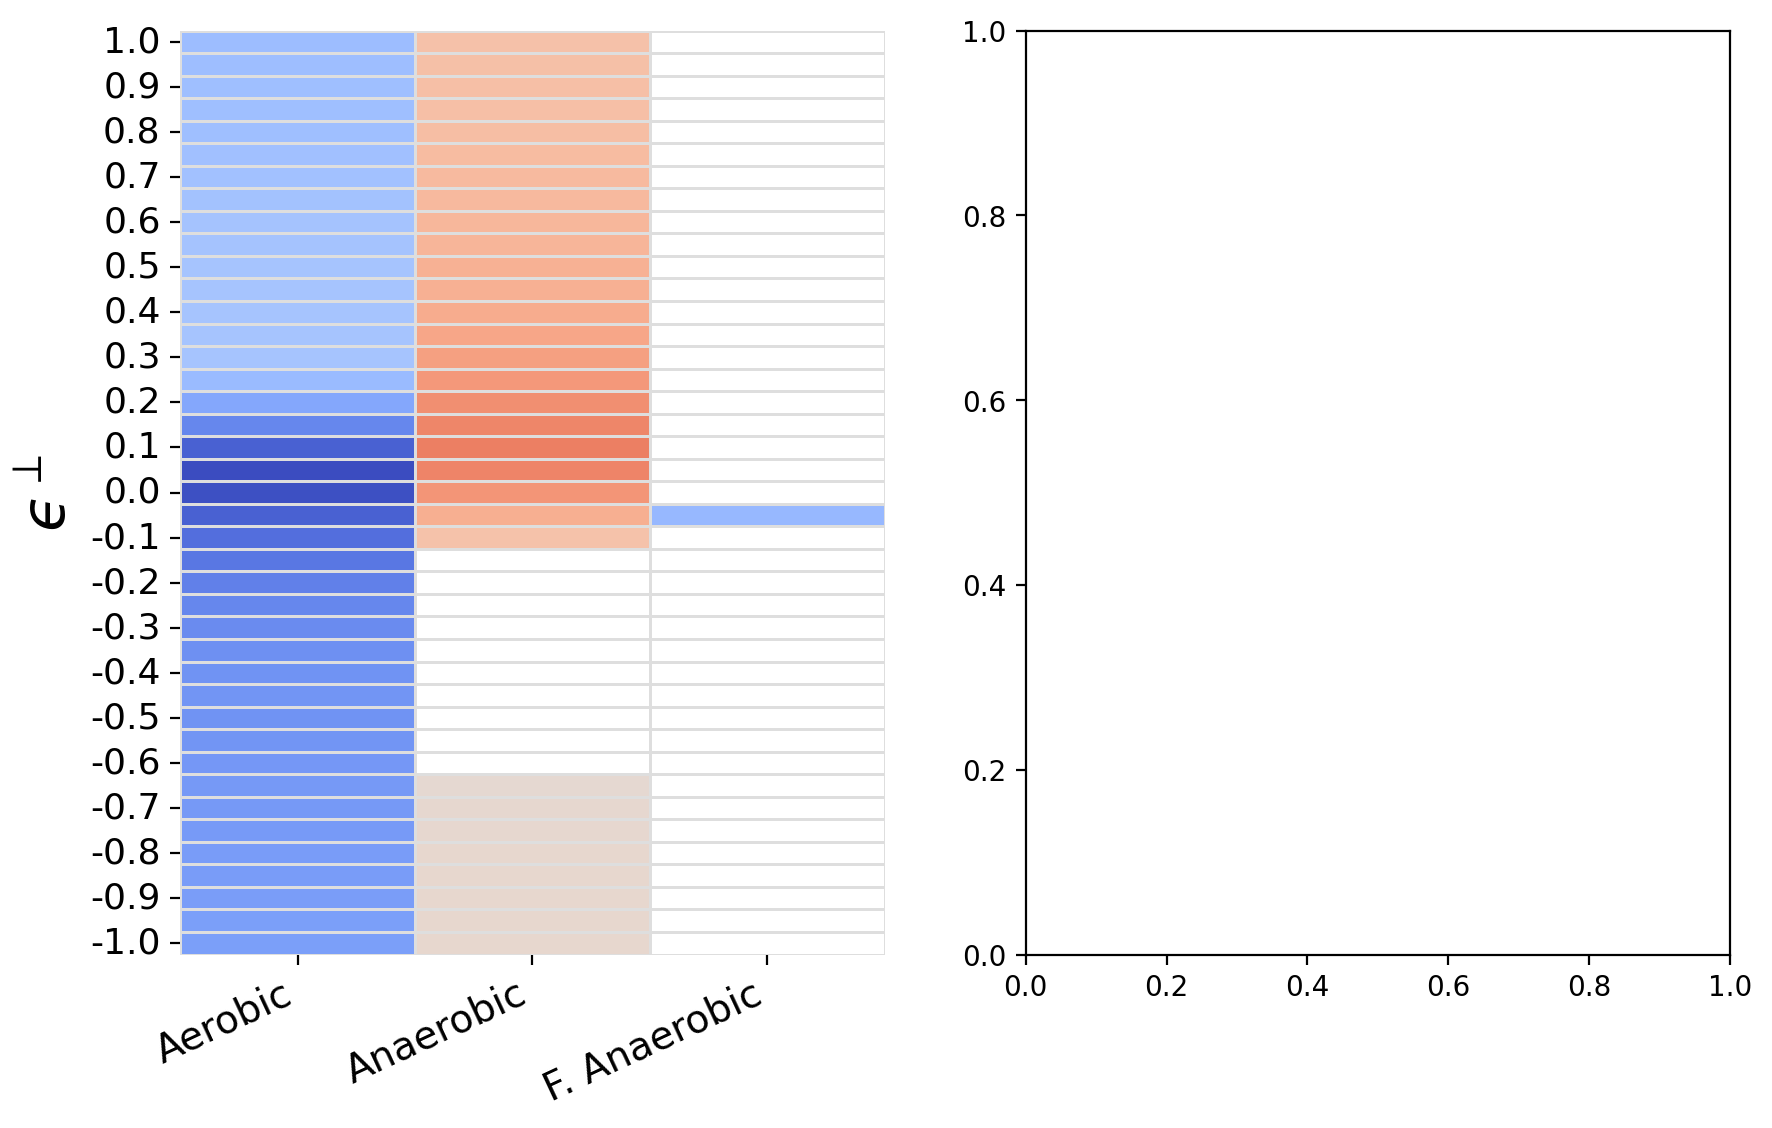

In [4]:
fig, axs = plt.subplot_mosaic([["a)", "b)"]], figsize=(10, 6), dpi=200)
print(axs["a)"])
sns.heatmap(gsea_lfc_df, ax=axs["a)"], center=0, cmap="coolwarm", linewidths=0.5, linecolor="#dedede", cbar=False)
axs["a)"].invert_yaxis()
axs["a)"].set_xticklabels(axs["a)"].get_xticklabels(), rotation=25, ha='right', fontsize=14)
axs["a)"].set_yticklabels(axs["a)"].get_yticklabels(), fontsize=13)
axs["a)"].axes.get_xaxis().get_label().set_visible(False)
axs["a)"].set_ylabel("$ϵ^\perp$", fontdict={"size": 22})
axs["a)"].figure.axes[-1].yaxis.label.set_size(13)

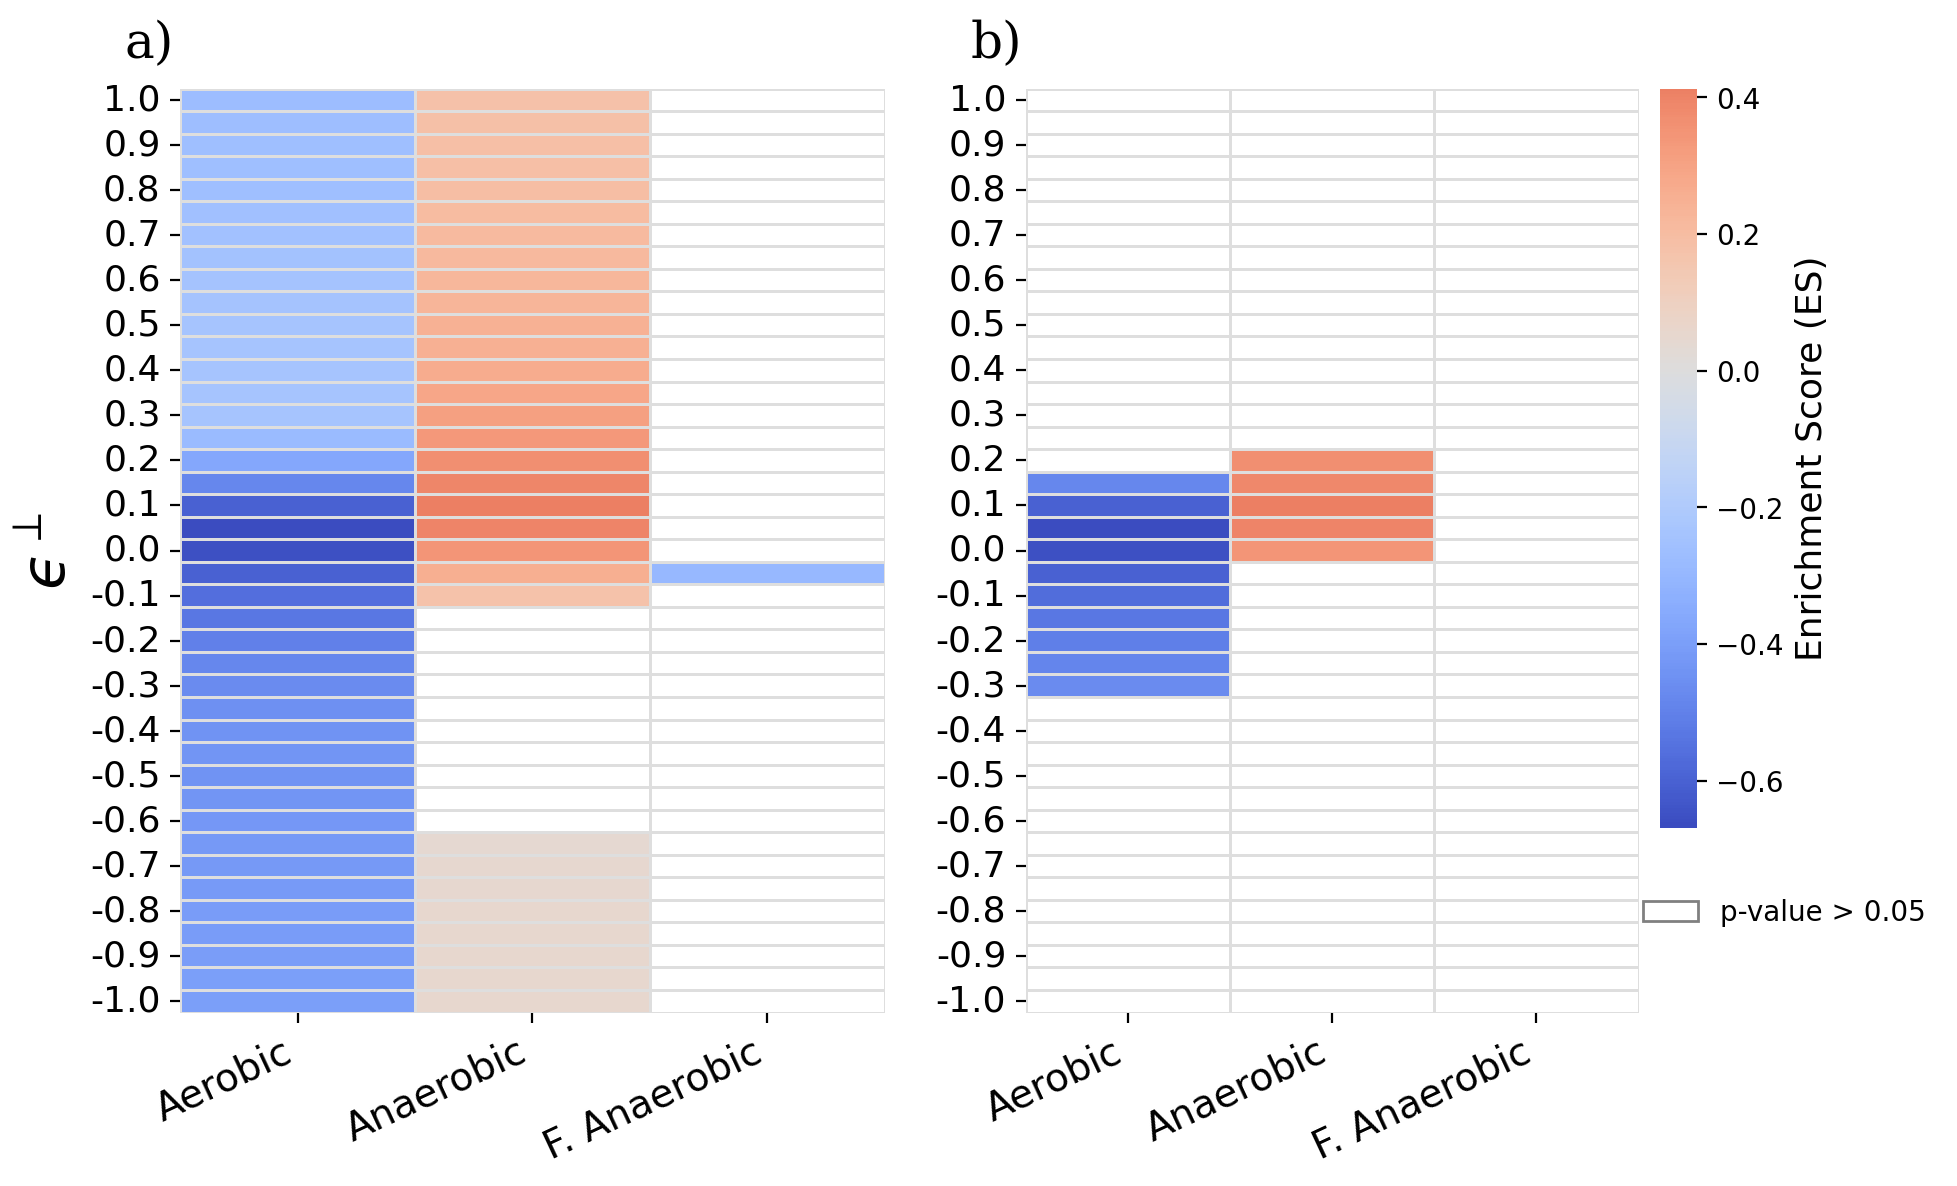

<Figure size 640x480 with 0 Axes>

In [5]:
sns.heatmap(gsea_lfc_s_df, ax=axs["b)"], center=0, cmap="coolwarm", linewidths=0.5, linecolor="#dedede",
           cbar_kws={'label': 'Enrichment Score (ES)', "shrink": .8,
                     "fraction": 0.1, "pad": 0.03, "anchor": (0, 1)}) 
axs["b)"].invert_yaxis()
axs["b)"].set_xticklabels(axs["b)"].get_xticklabels(), rotation=25, ha='right', fontsize=14)
axs["b)"].set_yticklabels(axs["b)"].get_yticklabels(), fontsize=13)
axs["b)"].axes.get_xaxis().get_label().set_visible(False)
axs["b)"].figure.axes[-1].yaxis.label.set_size(13)
axs["b)"].set_ylabel("", fontdict={"size": 22})
axs["b)"].legend(handles=[Patch(facecolor='white', edgecolor='grey', label="p-value > 0.05")],
          bbox_to_anchor=(1.01, -0.35, 0.5, 0.5), prop={'size': 10}, frameon=False)
plt.subplots_adjust(bottom=0.35)
for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=18, va='bottom', fontfamily='serif')
home = str(Path.home())
fig.savefig(os.path.join(home, 'data/output/figure_s_nyc_hanes.png'), dpi=fig.dpi)
fig